In [1]:
import pandas as pd 
import geopandas as gpd


# chemical analysis of water 

In [2]:
kemi = pd.read_csv("/Users/alteafogh/Documents/ITU/GDS/exam/gds-swimming-places/data_cleaning/Bathing_Water_2.csv")

filtering for bathing station 

we can decide if we want to have a filter for a specific place (f.ex, just kbh comune, or something like that)
there are a few more we could drop, if we decide for it, such as the enhed or whatever, depending on what we want to keep int the data to work with. mostly as it is irrelevant for what we need at the end (aka, date, and blue flag, with name of the place)

In [3]:
kemi.columns

Index(['﻿Stedtype', 'StedID', 'Stedtekst', 'Referencer', 'GeoZone',
       'x-koordinat', 'y-koordinat', 'Kommune', 'Region', 'Type', 'Medie',
       'Vandområde', 'Dataejer', 'Ansvarlig Myndighed', 'Link', 'Dato',
       'Måling nr', 'Undersøgelsestype', 'Målested type', 'Målested navn',
       'Målested GeoZone', 'Målested, x-koordinat', 'Målested, y-koordinat',
       'Prøvetype', 'Status', 'Analysefraktion', 'CASnr', 'ScKode',
       'Stofparameter', 'Resultat-attribut', 'Resultat', 'Enhed',
       'Kvantifikationsgrænse', 'Detektionsgrænse', 'Kvalitetsmærke'],
      dtype='object')

In [4]:
kemi = kemi[kemi["Målested type"]=="Badevandsstation"]


dropping columns I believe are unnecessary, so we have a smaller dataset. a lot of the drops were either duplicates, such as coordinates and names, or things I didn't think were important to keep

In [5]:
kemi = kemi.drop(kemi.columns[0], axis=1)
kemi= kemi.drop(columns=[ "Referencer", "Region","Dataejer","Ansvarlig Myndighed", "Link","Undersøgelsestype","CASnr", "ScKode","Kvantifikationsgrænse", "GeoZone",'x-koordinat','y-koordinat','Måling nr', "Medie", "Målested navn" ], axis=1)

In [6]:
kemi["Dato"]= pd.to_datetime(kemi["Dato"], format="%d-%m-%Y")
kemi = kemi.sort_values(by=["Dato"], ascending=False)

In [7]:
kemi

,StedID,Stedtekst,Kommune,Type,Vandområde,Dato,Målested type,Målested GeoZone,"Målested, x-koordinat","Målested, y-koordinat",Prøvetype,Status,Analysefraktion,Stofparameter,Resultat-attribut,Resultat,Enhed,Detektionsgrænse,Kvalitetsmærke
15458,7DADBE61-DD2E-4433-84E6-9C714BEEAEF2,"Dragør søbad, nord",Dragør,Badevandsstation,Køge Bugt,2025-04-16,Badevandsstation,32,731635.999999,6.166252e+06,Enkeltprøve,Afventer kontrol,Total,Escherichia coli,<,15.0,antal/100 ml,15.0,1
15634,7DADBE61-DD2E-4433-84E6-9C714BEEAEF2,"Dragør søbad, nord",Dragør,Badevandsstation,Køge Bugt,2025-04-16,Badevandsstation,32,731635.999999,6.166252e+06,Enkeltprøve,Afventer kontrol,Total,Intestinal enterokokker,<,15.0,antal/100 ml,15.0,1
13659,DC6E765D-44AF-4F4F-AA2E-90432C57410A,Islands Brygge Havnebad,København,Badevandsstation,København Havn,2025-04-10,Badevandsstation,32,724995.999999,6.175013e+06,Enkeltprøve,Afventer kontrol,Total,Intestinal enterokokker,<,15.0,antal/100 ml,15.0,1
779,CE05AC8C-288C-4D22-9EDC-2633DCFB95B3,Byskoven Badezone,København,Badevandsstation,NaN,2025-04-10,Badevandsstation,32,721826.000000,6.169628e+06,Enkeltprøve,Afventer kontrol,Total,Intestinal enterokokker,<,15.0,antal/100 ml,15.0,1
16515,4FFFFE86-4C75-4D81-B639-9E7700E24E47,Sandkaj Badezone,København,Badevandsstation,København Havn,2025-04-10,Badevandsstation,32,726027.999999,6.179292e+06,Enkeltprøve,Afventer kontrol,Total,Escherichia coli,<,15.0,antal/100 ml,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21008,8F1EAC66-DB32-4BC3-AAC5-F9A522442897,Kastrup søbad,Tårnby,Badevandsstation,Mangler,1990-05-15,Badevandsstation,32,730169.999999,6.171346e+06,Enkeltprøve,Godkendt,Ej oplyst,Escherichia coli,NaN,2.0,antal/100 ml,15.0,2
15102,7DADBE61-DD2E-4433-84E6-9C714BEEAEF2,"Dragør søbad, nord",Dragør,Badevandsstation,Køge Bugt,1990-05-07,Badevandsstation,32,731635.999999,6.166252e+06,Enkeltprøve,Godkendt,Ej oplyst,Escherichia coli,NaN,2.0,antal/100 ml,15.0,2
20968,8F1EAC66-DB32-4BC3-AAC5-F9A522442897,Kastrup søbad,Tårnby,Badevandsstation,Mangler,1990-05-07,Badevandsstation,32,730169.999999,6.171346e+06,Enkeltprøve,Godkendt,Ej oplyst,Escherichia coli,NaN,2.0,antal/100 ml,15.0,2
18495,6B0DA2AE-4E80-477C-8D00-BBE2EC7C385C,Dragør Nordstrand,Dragør,Badevandsstation,Nordlige Øresund,1990-05-07,Badevandsstation,32,731373.999999,6.168070e+06,Enkeltprøve,Godkendt,Ej oplyst,Escherichia coli,NaN,8.0,antal/100 ml,15.0,2


In [8]:
kemi["Good_water"] = kemi["Resultat"] <= kemi["Detektionsgrænse"]


In [9]:
filtered = kemi.sort_values("Dato", ascending=False)

# Step 2: Get the latest measurement per Badepunkt
latest = filtered.groupby('Stedtekst', as_index=False).first()
latest

,Stedtekst,StedID,Kommune,Type,Vandområde,Dato,Målested type,Målested GeoZone,"Målested, x-koordinat","Målested, y-koordinat",Prøvetype,Status,Analysefraktion,Stofparameter,Resultat-attribut,Resultat,Enhed,Detektionsgrænse,Kvalitetsmærke,Good_water
0,La Banchina Badezone,01C08816-50FC-4174-B138-D71A7A41AE86,København,Badevandsstation,Københavns Havn,2025-04-01,Badevandsstation,32,726936.270936,6.177409e+06,Enkeltprøve,Afventer kontrol,Total,Intestinal enterokokker,<,30.0,antal/100 ml,15.0,1,False
1,"Amager Strandpark, Lagunen",A737A4B7-CDAC-419C-BEC7-3B378D37CD38,København,Badevandsstation,Øresund,2025-04-01,Badevandsstation,32,728965.999999,6.174017e+06,Enkeltprøve,Afventer kontrol,Total,Escherichia coli,<,15.0,antal/100 ml,15.0,1,True
2,"Amager Strandpark, Øresund",4071CFD8-3AAB-4142-8D3E-A4161E476DE8,København,Badevandsstation,Øresund,2025-04-10,Badevandsstation,32,729243.999999,6.174100e+06,Enkeltprøve,Afventer kontrol,Total,Intestinal enterokokker,<,15.0,antal/100 ml,15.0,1,True
3,Amager Sydstrand,414ECED6-2A07-4E81-9AED-C6FA81F9F9A0,Dragør,Badevandsstation,Køge Bugt,2024-08-20,Badevandsstation,32,730581.999999,6.165532e+06,Enkeltprøve,Godkendt,Total,Escherichia coli,<,30.0,antal/100 ml,15.0,2,False
4,Byskoven Badezone,CE05AC8C-288C-4D22-9EDC-2633DCFB95B3,København,Badevandsstation,None,2025-04-10,Badevandsstation,32,721826.000000,6.169628e+06,Enkeltprøve,Afventer kontrol,Total,Escherichia coli,<,15.0,antal/100 ml,15.0,1,True
5,Dragør Nordstrand,6B0DA2AE-4E80-477C-8D00-BBE2EC7C385C,Dragør,Badevandsstation,Nordlige Øresund,2024-08-20,Badevandsstation,32,731373.999999,6.168070e+06,Enkeltprøve,Godkendt,Total,Escherichia coli,<,15.0,antal/100 ml,15.0,2,True
6,"Dragør Søbad, Syd",51179F3A-1808-4779-8F87-BD170DD6507F,Dragør,Badevandsstation,Mangler,1999-09-14,Badevandsstation,32,731609.999999,6.166209e+06,Enkeltprøve,Godkendt,Ej oplyst,Escherichia coli,None,5.0,antal/100 ml,15.0,2,True
7,"Dragør søbad, nord",7DADBE61-DD2E-4433-84E6-9C714BEEAEF2,Dragør,Badevandsstation,Køge Bugt,2025-04-16,Badevandsstation,32,731635.999999,6.166252e+06,Enkeltprøve,Afventer kontrol,Total,Escherichia coli,<,15.0,antal/100 ml,15.0,1,True
8,Fisketorvet Havnebad,743F1F78-557B-4B63-9E38-4A152A24EFDB,København,Badevandsstation,København Havn,2025-04-01,Badevandsstation,32,724154.000000,6.174298e+06,Enkeltprøve,Afventer kontrol,Total,Intestinal enterokokker,<,15.0,antal/100 ml,15.0,1,True
9,Halfdansgade Badezone,C47BB679-BB21-4311-9761-7C2A9728B80D,København,Badevandsstation,København Havn,2025-04-01,Badevandsstation,32,724808.000000,6.174717e+06,Enkeltprøve,Afventer kontrol,Total,Intestinal enterokokker,<,15.0,antal/100 ml,15.0,1,True


In [10]:
kommuner_to_keep = list(latest.Kommune.unique())
kommuner_to_keep

['København', 'Dragør', 'Gentofte', 'Hvidovre', 'Tårnby']

In [11]:
kemi.to_csv("output/Bathing_water_cleaned2.csv")
latest.to_csv("output/latest_measurements.csv")

# now for the puls data

In [12]:
bath = pd.read_csv("/Users/alteafogh/Documents/ITU/GDS/exam/gds-swimming-places/data_cleaning/puls-vBadevandsanlaegStamdata.csv", sep=";")

In [13]:
bath.columns

Index(['BathingwaterStationId', 'Name', 'Latitude', 'Longitude', 'Location',
       'Responsible', 'Type', 'WaterType', 'WaterArea', 'WaterAreaNumber',
       'Started', 'Closed', 'BlueFlag', 'ProfileUrl', 'Main'],
      dtype='object')

In [14]:

kommuner_to_keep = [k.lower() for k in kommuner_to_keep]
bath['Responsible_lower'] = bath['Responsible'].str.lower()
bath_filtered = bath[bath['Responsible_lower'].apply(lambda x: any(k in x for k in kommuner_to_keep))]
bath_filtered = bath_filtered.drop(columns='Responsible_lower')

In [15]:
bath_filtered = bath_filtered[bath_filtered["Type"]=="Badevandsstation"]

In [16]:
bath_filtered.columns

Index(['BathingwaterStationId', 'Name', 'Latitude', 'Longitude', 'Location',
       'Responsible', 'Type', 'WaterType', 'WaterArea', 'WaterAreaNumber',
       'Started', 'Closed', 'BlueFlag', 'ProfileUrl', 'Main'],
      dtype='object')

In [17]:
bath = bath[bath["Closed"].isna()]

In [18]:
bath2 = bath_filtered.drop(columns=["ProfileUrl", "Main", "BathingwaterStationId","WaterType", "WaterAreaNumber", "Responsible", "Location", "Started", "Closed","Type" ])

In [19]:
bath2.to_csv("output/bathing_places_cleaned.csv")


# joining two datasets

Badevandstamdata has coordinate system: EPSG:25832
kemidata has the coordinate system EPSG:25832

so I am going to join the two datasets together:


In [20]:
df_kemi =latest
df_bath = bath2

In [21]:
print(df_kemi.shape)
print(df_bath.shape)

(35, 20)
(42, 5)


In [22]:
df_bath["Latitude"] = df_bath["Latitude"].str.replace(",",".")
df_bath["Longitude"] = df_bath["Longitude"].str.replace(",",".")
df_bath["Latitude"] = pd.to_numeric(df_bath["Latitude"])
df_bath["Longitude"] = pd.to_numeric(df_bath["Longitude"])

In [23]:
gdf_kemi = gpd.GeoDataFrame(df_kemi, geometry=gpd.points_from_xy(df_kemi["Målested, x-koordinat"], df_kemi["Målested, y-koordinat"]), crs="EPSG:25832")

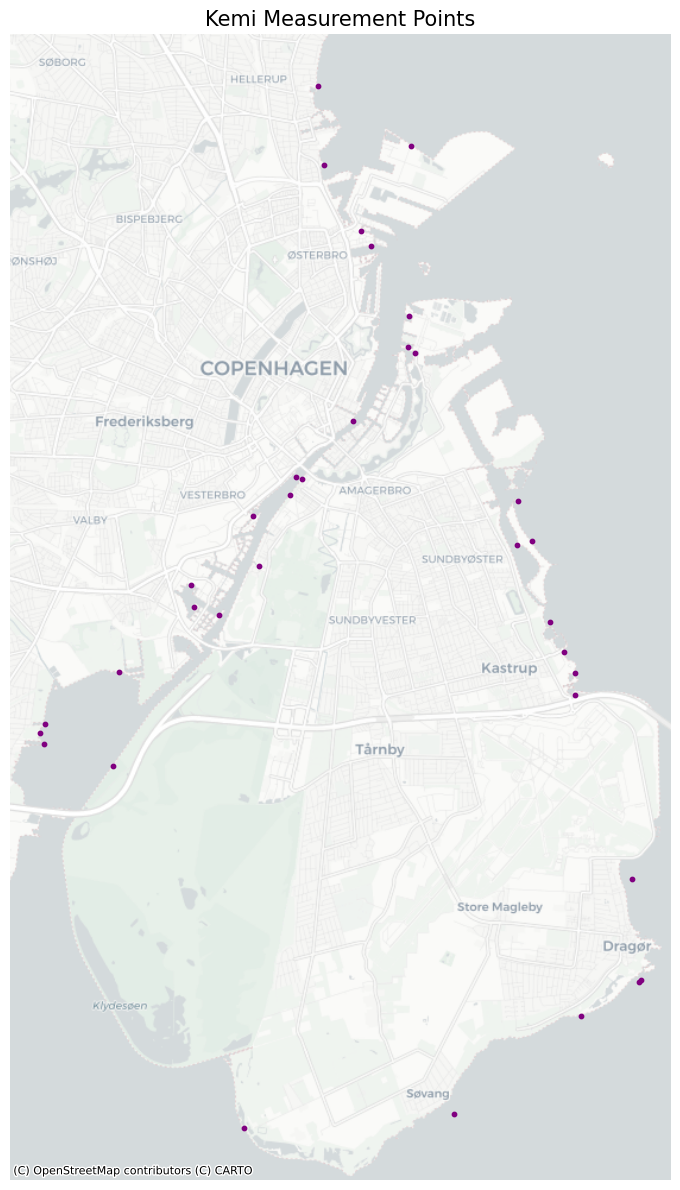

In [35]:
import matplotlib.pyplot as plt
import contextily as cx

# Make sure your GeoDataFrame is in Web Mercator for the basemap (EPSG:3857)
gdf_kemi_web = gdf_kemi.to_crs(epsg=3857)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot your geospatial points (purple dots)
gdf_kemi_web.plot(ax=ax, color='purple', markersize=10)

# Remove axis for cleaner output
ax.set_axis_off()

# Add basemap (e.g., CartoDB Positron)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=gdf_kemi_web.crs)

# Add title
ax.set_title('Kemi Measurement Points', fontsize=15)

# Tight layout to ensure all is visible
plt.tight_layout()
plt.show()


In [41]:
gdf_bath = gpd.GeoDataFrame(df_bath, geometry=gpd.points_from_xy(df_bath["Longitude"],df_bath["Latitude"]), crs="EPSG:4326")

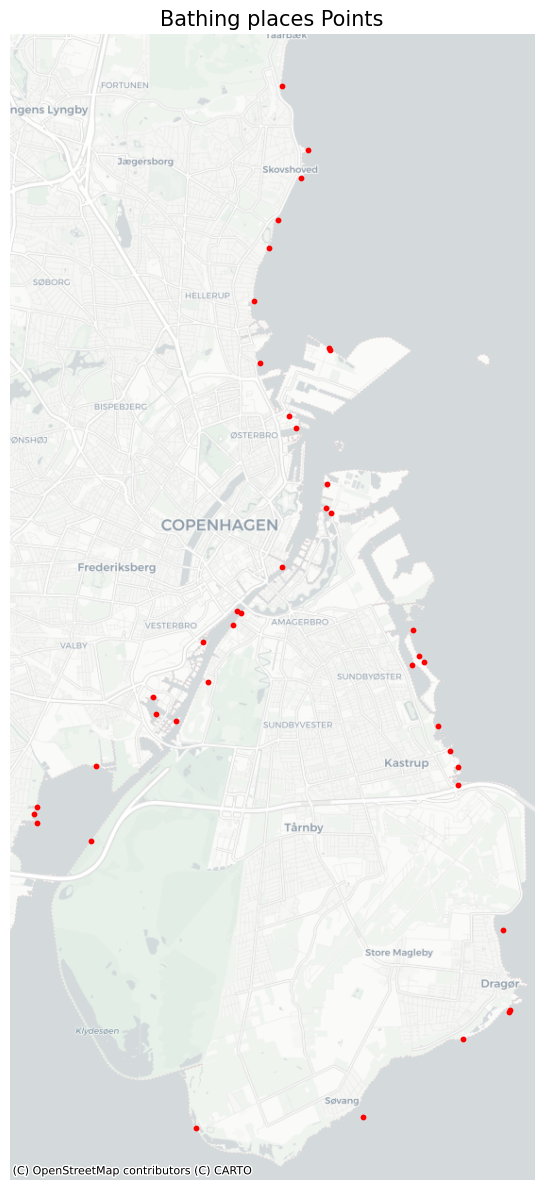

In [42]:
import matplotlib.pyplot as plt
import contextily as cx

# Make sure your GeoDataFrame is in Web Mercator for the basemap (EPSG:3857)
gdf_bath_web = gdf_bath.to_crs(epsg=3857)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot your geospatial points (purple dots)
gdf_bath_web.plot(ax=ax, color='red', markersize=10)

# Remove axis for cleaner output
ax.set_axis_off()

# Add basemap (e.g., CartoDB Positron)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=gdf_bath_web.crs)

# Add title
ax.set_title('Bathing places Points', fontsize=15)

# Tight layout to ensure all is visible
plt.tight_layout()
plt.show()


In [44]:
gdf_bath = gdf_bath.to_crs("EPSG:25832")

In [45]:
print(gdf_bath.crs)
print(gdf_kemi.crs)


EPSG:25832
EPSG:25832


In [46]:
gdf_joined = gpd.sjoin_nearest(gdf_kemi, gdf_bath,  how="left")


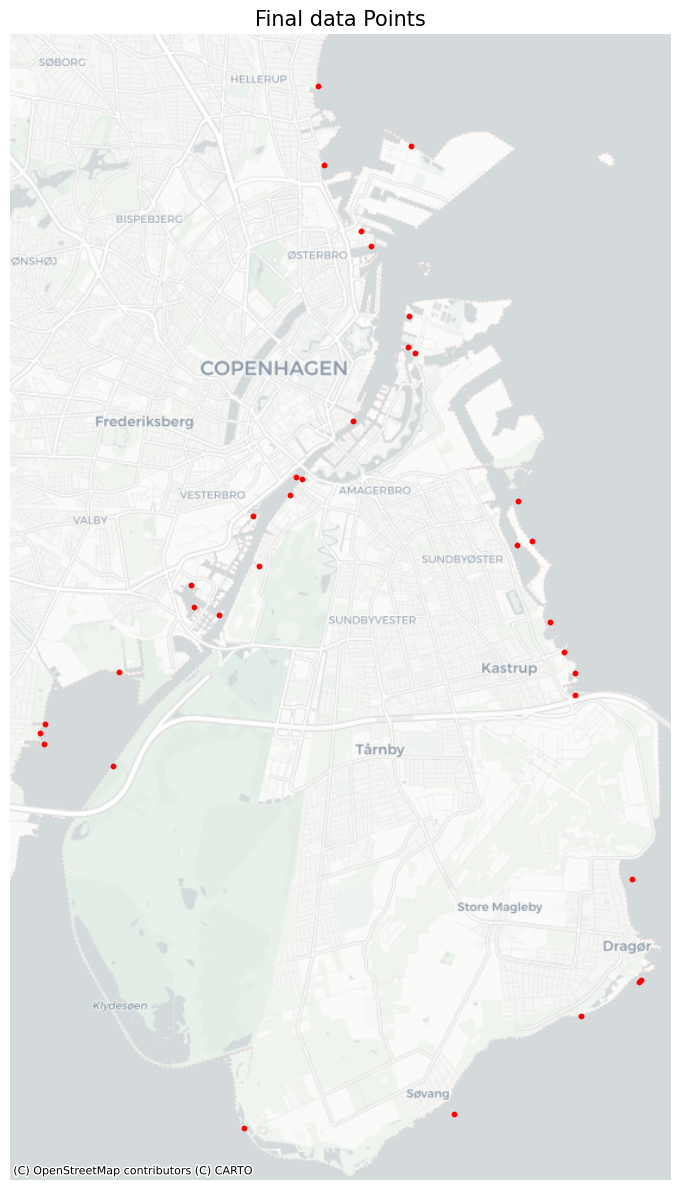

In [49]:
# Make sure your GeoDataFrame is in Web Mercator for the basemap (EPSG:3857)
gdf_joined_web = gdf_joined.to_crs(epsg=3857)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot your geospatial points (purple dots)
gdf_joined_web.plot(ax=ax, color='red', markersize=10)

# Remove axis for cleaner output
ax.set_axis_off()

# Add basemap (e.g., CartoDB Positron)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=gdf_joined_web.crs)

# Add title
ax.set_title('Final data Points', fontsize=15)

# Tight layout to ensure all is visible
plt.tight_layout()
plt.show()


In [29]:
final_final  = gdf_joined[['Name', 'Latitude', 'Longitude', 'WaterArea', 'Good_water',
       'Stofparameter', 'Dato']]

In [30]:
final_final

,Name,Latitude,Longitude,WaterArea,Good_water,Stofparameter,Dato
0,La Banchina Badezone,55.689290,12.610640,Københavns Havn,False,Intestinal enterokokker,2025-04-01
1,"Amager Strandpark, Lagunen",55.657922,12.640032,Øresund,True,Escherichia coli,2025-04-01
2,"Amager Strandpark, Øresund",55.658536,12.644511,Øresund,True,Intestinal enterokokker,2025-04-10
3,Amager Sydstrand,55.581072,12.658562,Køge Bugt,False,Escherichia coli,2024-08-20
4,Byskoven Badezone,55.621871,12.523228,NaN,True,Escherichia coli,2025-04-10
5,Dragør Nordstrand,55.603456,12.673228,Nordlige Øresund,True,Escherichia coli,2024-08-20
6,"Dragør Søbad, Syd",55.586656,12.675404,Mangler,True,Escherichia coli,1999-09-14
7,"Dragør søbad, nord",55.587029,12.675851,Køge Bugt,True,Escherichia coli,2025-04-16
8,Fisketorvet Havnebad,55.662685,12.563929,København Havn,True,Intestinal enterokokker,2025-04-01
9,Halfdansgade Badezone,55.666141,12.574648,København Havn,True,Intestinal enterokokker,2025-04-01


In [31]:
final_final.to_csv("output/final_dataset.csv")